In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10
)

train_generator = train_datagen.flow_from_directory(
    'dataset\train',
    target_size = ( IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  32,
    class_mode = 'sparse',

)

Found 8621 images belonging to 6 classes.


In [3]:
train_generator.class_indices

{'Calculus': 0,
 'Data caries': 1,
 'Gingivitis': 2,
 'Mouth Ulcer': 3,
 'Tooth Discoloration': 4,
 'hypodontia': 5}

In [4]:
class_names = list(train_generator.class_indices.keys())
class_names

['Calculus',
 'Data caries',
 'Gingivitis',
 'Mouth Ulcer',
 'Tooth Discoloration',
 'hypodontia']

In [5]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10
)

validation_generator = validation_datagen.flow_from_directory(
    '\dataset\val',
    target_size = ( IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  32,
    class_mode = 'sparse',

)

Found 1229 images belonging to 6 classes.


In [6]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10
)

test_generator = test_datagen.flow_from_directory(
    'dataset\test',
    target_size = ( IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  32,
    class_mode = 'sparse',

)

Found 2470 images belonging to 6 classes.


In [7]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'), 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)), 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation = 'softmax'),                       
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [9]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']

)

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch = 269,
    batch_size = 32,
    validation_data = validation_generator,
    validation_steps = 6,
    verbose = 1,
    epochs = 50
)

Epoch 1/50
269/269 [==============================] - 95s 302ms/step - loss: 1.4370 - accuracy: 0.3933 - val_loss: 1.0868 - val_accuracy: 0.5833
Epoch 2/50
269/269 [==============================] - 82s 304ms/step - loss: 1.0617 - accuracy: 0.5483 - val_loss: 1.0180 - val_accuracy: 0.5521
Epoch 3/50
269/269 [==============================] - 80s 298ms/step - loss: 0.9260 - accuracy: 0.6121 - val_loss: 0.9307 - val_accuracy: 0.6146
Epoch 4/50
269/269 [==============================] - 82s 306ms/step - loss: 0.8309 - accuracy: 0.6523 - val_loss: 0.7572 - val_accuracy: 0.6719
Epoch 5/50
269/269 [==============================] - 81s 299ms/step - loss: 0.7593 - accuracy: 0.6813 - val_loss: 0.7449 - val_accuracy: 0.6510
Epoch 6/50
269/269 [==============================] - 84s 310ms/step - loss: 0.7038 - accuracy: 0.7047 - val_loss: 0.6521 - val_accuracy: 0.7448
Epoch 7/50
269/269 [==============================] - 80s 299ms/step - loss: 0.6523 - accuracy: 0.7229 - val_loss: 0.5924 - val_ac

In [11]:
scores = model.evaluate(test_generator)

78/78 [==============================] - 34s 436ms/step - loss: 0.4700 - accuracy: 0.8437


In [12]:
scores

[0.470012366771698, 0.8437246680259705]

In [13]:
history

In [14]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 269}

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
type(history.history['loss'])

list

In [17]:
history.history['loss'][:5]  #show loss of first 5 epochs

[1.436954140663147,
 1.0616765022277832,
 0.9259636402130127,
 0.8308818936347961,
 0.7592681050300598]

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [19]:
val_acc

[0.5833333134651184,
 0.5520833134651184,
 0.6145833134651184,
 0.671875,
 0.6510416865348816,
 0.7447916865348816,
 0.78125,
 0.7239583134651184,
 0.765625,
 0.7760416865348816,
 0.7708333134651184,
 0.7135416865348816,
 0.75,
 0.78125,
 0.8385416865348816,
 0.7864583134651184,
 0.8177083134651184,
 0.8125,
 0.8177083134651184,
 0.8177083134651184,
 0.859375,
 0.8645833134651184,
 0.8489583134651184,
 0.859375,
 0.8020833134651184,
 0.8333333134651184,
 0.8333333134651184,
 0.8229166865348816,
 0.7760416865348816,
 0.8697916865348816,
 0.8177083134651184,
 0.8125,
 0.84375,
 0.8645833134651184,
 0.84375,
 0.8385416865348816,
 0.8541666865348816,
 0.859375,
 0.828125,
 0.84375,
 0.8541666865348816,
 0.859375,
 0.8489583134651184,
 0.859375,
 0.8802083134651184,
 0.875,
 0.890625,
 0.8802083134651184,
 0.875,
 0.8385416865348816]

In [20]:
acc

[0.39329373836517334,
 0.5482593774795532,
 0.6120619177818298,
 0.6523460149765015,
 0.6813365817070007,
 0.7047386169433594,
 0.7229014039039612,
 0.7437419891357422,
 0.7634183168411255,
 0.7769239544868469,
 0.7853068113327026,
 0.8020724058151245,
 0.8074281215667725,
 0.8172080516815186,
 0.8246594667434692,
 0.8342065215110779,
 0.8517871499061584,
 0.856095016002655,
 0.8665735125541687,
 0.8633135557174683,
 0.8751891851425171,
 0.8736756443977356,
 0.8785656094551086,
 0.8909069895744324,
 0.886249840259552,
 0.8941669464111328,
 0.8910233974456787,
 0.9074397683143616,
 0.9063919186592102,
 0.895564079284668,
 0.9095354676246643,
 0.9063919186592102,
 0.9044126272201538,
 0.9144254326820374,
 0.9062754511833191,
 0.9126790165901184,
 0.9059261679649353,
 0.9146583080291748,
 0.9180346727371216,
 0.9198975563049316,
 0.920013964176178,
 0.9150075912475586,
 0.9228082299232483,
 0.9115146994590759,
 0.9235067963600159,
 0.9272325038909912,
 0.9228082299232483,
 0.9208289384841

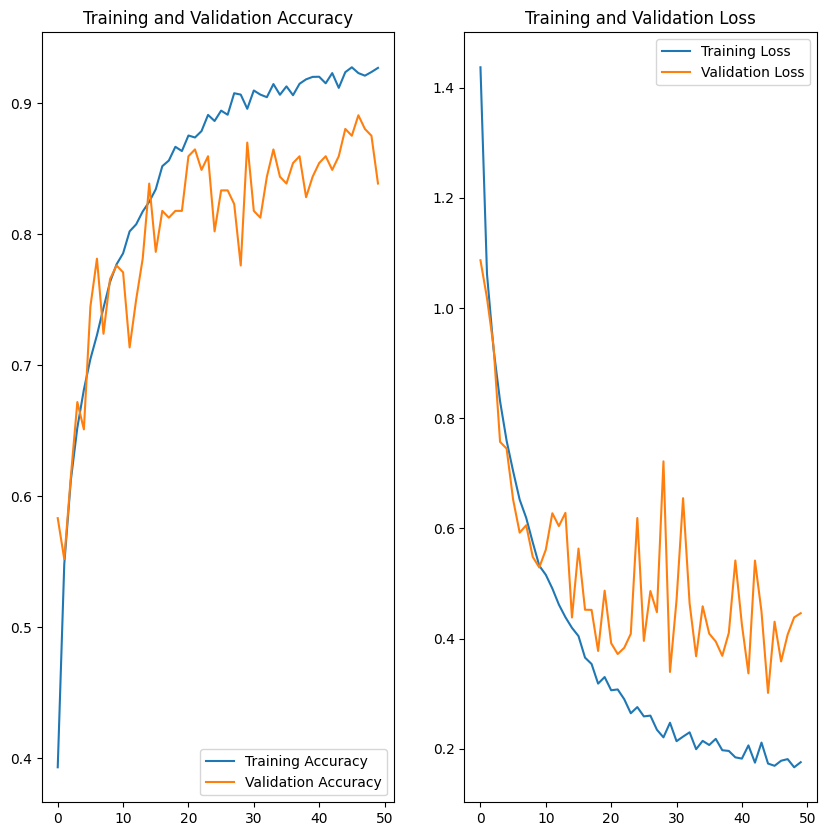

In [21]:
EPOCHS = 50

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Data caries
predicted label: Data caries


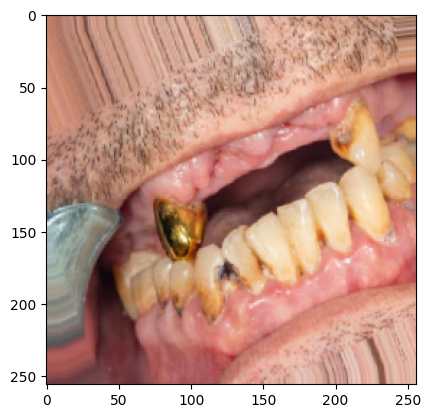

In [36]:
# run Predicition on a Sample Image

import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break  

In [37]:
# function for interference 
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

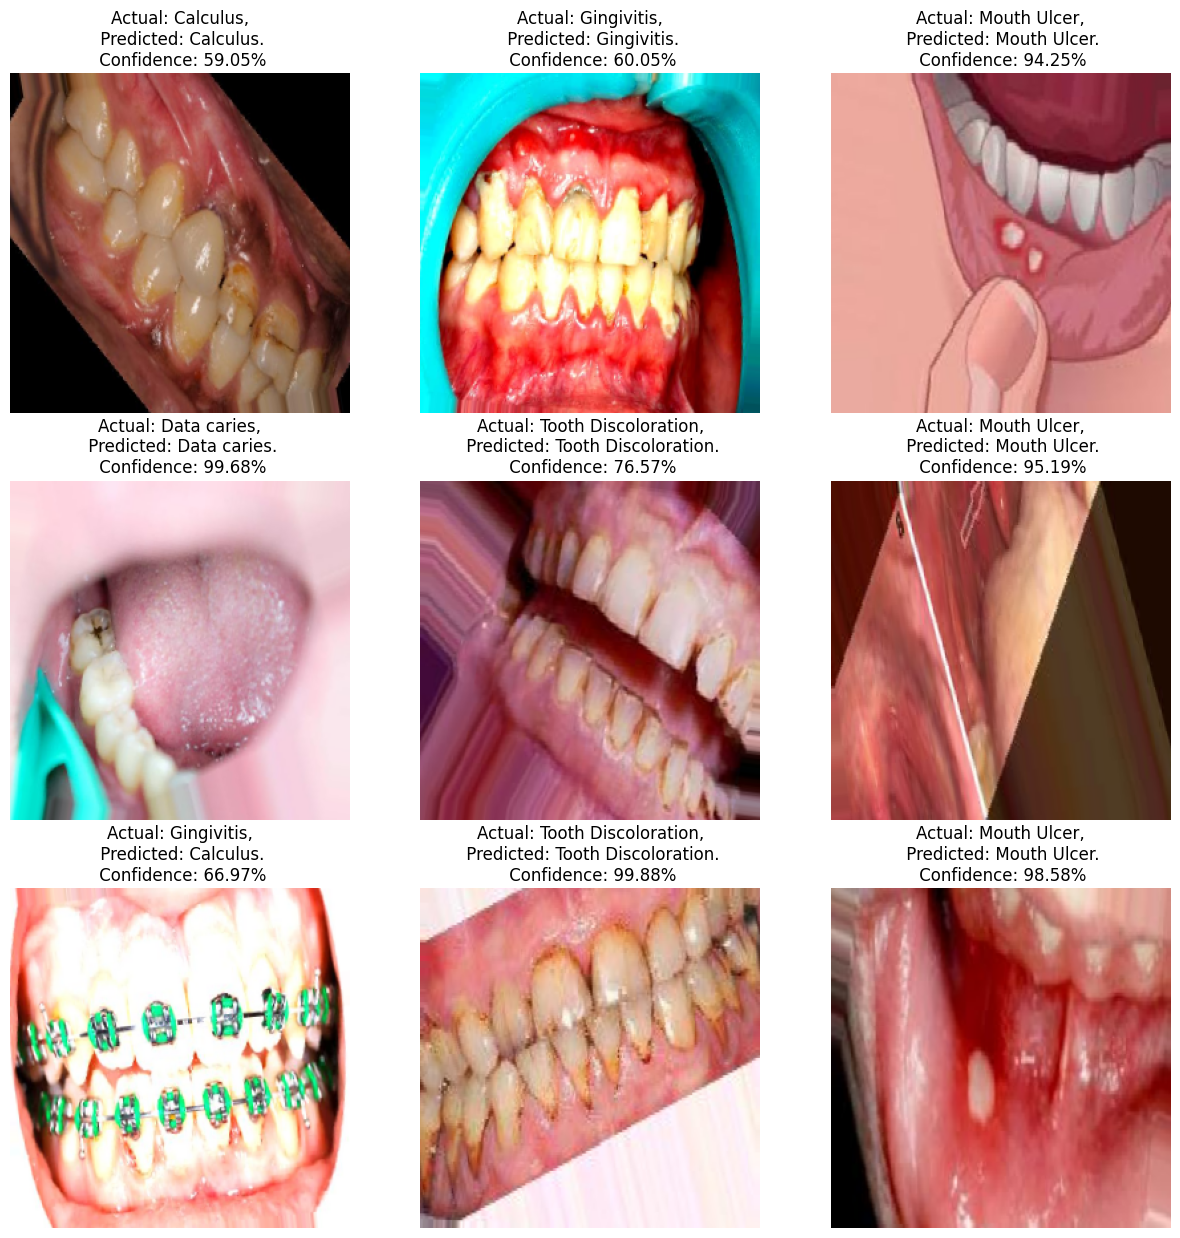

In [39]:
# running interfernce on a few sample images

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [40]:
model.save("Dental-Model\Models\2") 

INFO:tensorflow:Assets written to: C:\Users\kiran\Dental-Model\Models\2\assets


In [41]:
model.save("dixiIMGv1.h5") 